In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
X = pd.read_csv("diabetes.csv")
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
X = pd.read_csv("diabetes.csv",index_col=False, usecols=[0,1,2,3,4,5,6,7])
y = pd.read_csv("diabetes.csv",index_col=False, usecols=[8])

X_data,y_data = X.values , y.values
y_data=y_data.reshape(-1)

In [14]:
X_data.shape

(768, 8)

In [19]:
y_data.shape

(768,)

In [20]:
std = StandardScaler()
X_data = std.fit_transform(X_data)
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.8,random_state=42)

In [31]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.6883116883116883

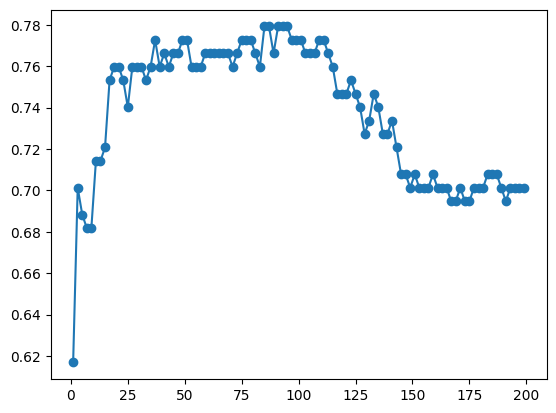

In [43]:
# graph acc vs k 
acc = []
for i in range(1,201,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

k = list(range(1,201,2))


plt.plot(k,acc,marker='o')
plt.show()
